In [6]:
import pandas as pd 

TRAINING_DATA = pd.read_csv("./titanic-train.csv")
TRAINING_DATA.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
1,2,0,3,"Asim, Mr. Adola",male,35.0,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
2,3,0,3,"Nankoff, Mr. Minko",male,NaN,0,0,349218,7.8958,NaN,S
3,4,0,1,"Thayer, Mr. John Borland",male,49.0,1,1,17421,110.8833,C68,C
4,5,0,3,"Strandberg, Miss. Ida Sofia",female,22.0,0,0,7553,9.8375,NaN,S


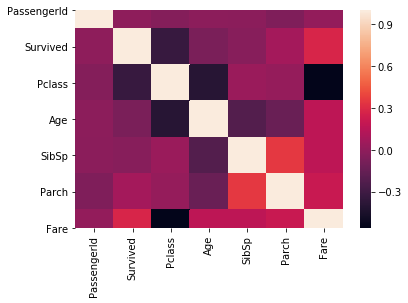

In [7]:
import seaborn as sb
corr = TRAINING_DATA.corr()
sb.heatmap(corr)


In [8]:
TRAINING_DATA['Gender'] = TRAINING_DATA['Gender'].apply(lambda toLabel: 0 if toLabel == 'male' else 1)

TRAINING_DATA.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,B71,S
1,2,0,3,"Asim, Mr. Adola",0,35.0,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
2,3,0,3,"Nankoff, Mr. Minko",0,NaN,0,0,349218,7.8958,NaN,S
3,4,0,1,"Thayer, Mr. John Borland",0,49.0,1,1,17421,110.8833,C68,C
4,5,0,3,"Strandberg, Miss. Ida Sofia",1,22.0,0,0,7553,9.8375,NaN,S


In [12]:
TRAINING_DATA['Age'].fillna(TRAINING_DATA['Age'].mean(), inplace=True)
TRAINING_DATA.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1,"Davidson, Mr. Thornton",0,31.000000,1,0,F.C. 12750,52.0000,B71,S
1,2,0,3,"Asim, Mr. Adola",0,35.000000,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
2,3,0,3,"Nankoff, Mr. Minko",0,29.970867,0,0,349218,7.8958,NaN,S
3,4,0,1,"Thayer, Mr. John Borland",0,49.000000,1,1,17421,110.8833,C68,C
4,5,0,3,"Strandberg, Miss. Ida Sofia",1,22.000000,0,0,7553,9.8375,NaN,S


In [16]:
TARGETS = TRAINING_DATA['Survived']
TARGETS

0      0
1      0
2      0
3      0
4      0
      ..
910    0
911    0
912    0
913    0
914    0
Name: Survived, Length: 915, dtype: int64

In [18]:
TARGETS = TRAINING_DATA['Survived'].values
TARGETS

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,

In [22]:
columns = ['Fare', 'Pclass', "Gender", "Age", "SibSp"]
X = TRAINING_DATA[list(columns)].values
X

array([[52.        ,  1.        ,  0.        , 31.        ,  1.        ],
       [ 7.05      ,  3.        ,  0.        , 35.        ,  0.        ],
       [ 7.8958    ,  3.        ,  0.        , 29.97086721,  0.        ],
       ...,
       [ 8.6625    ,  3.        ,  0.        , 27.        ,  0.        ],
       [ 0.        ,  3.        ,  0.        , 49.        ,  0.        ],
       [ 7.75      ,  3.        ,  0.        , 29.97086721,  0.        ]])

In [23]:
from sklearn import tree 
decision_tree_classifier = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
decision_tree_classifier.fit(X, TARGETS)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [25]:
decision_tree_classifier.score(X, TARGETS) #81% accuracy

0.8163934426229508

In [26]:
from sklearn.externals.six import StringIO 
with open('./titanic.dot', 'w') as f:
    f = tree.export_graphviz(decision_tree_classifier, out_file=f, feature_names=columns)

C:\Users\Fabian\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [30]:
testing = pd.read_csv("./titanic-test.csv")
testing['Gender'] = testing['Gender'].apply(lambda toLabel: 0 if toLabel == 'male' else 1)
testing["Age"].fillna(testing["Age"].mean(), inplace=True)

X = testing[list(columns)].values
target_labels = decision_tree_classifier.predict(X)
target_labels = pd.DataFrame({'Est_Survival':target_labels, 'Name':testing['Name']})

In [35]:
import numpy as np 

all_data = pd.read_csv("./titanic_all.csv")
testing_results = pd.merge(target_labels, all_data[['Name','Survived']], on=['Name'])
all_data = pd.read_csv("./titanic_all.csv", usecols=['Survived','Pclass','Gender','Age','SibSp','Fare'])

In [39]:
#Import train_test_split() from the sklearn.model_selection libary 
from sklearn.model_selection import train_test_split

#create the input and target variables as uppercase X and lowercase y. Reuse the columns variable.
X = all_data[list(columns)].values
y = all_data["Survived"].values

#generate the four testing and training data arrays with the train_test_split() method
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.40, random_state=0)

In [41]:
#code cell 26
#create the training decision tree object
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

#fit the training model using the input and target variables
clf_train = clf_train.fit(X, y_train)

ValueError: could not convert string to float: 'female'